# **Final Project by Beta Team: Bank Marketing Campaigns Data**

Team Members:
- Nuh Neguita Gurusinga
- Sylvia Sinnelius


## **Table of Contents**
I. Business Understanding <br>

II. Data Understanding

III. Exploratory Data Analysis <br>

i. Client Behaviour <br>
ii. Campaign Dynamics <br>
iii. Conclusion <br>
iv. Recommendation <br>

IV. Machine Learning

V. C.L.R (Conclusion, Limitation & Recommendation)

VI. Business Recommendation
___

# **I. Business Understanding**

## **i. Background**

A bank is a financial institution that accepts deposits from the public, creating demand deposits while facilitating loans. Bank deposits, serving as a savings product, offer customers the opportunity to hold money for a specified time, earning interest. With flexible terms, deposits cater to diverse financial goals. Surprisingly, data analysis reveals that **only around 11% of bank customers actively utilize deposit services, challenging assumptions about their prevalence.**

Machine learning predictions will leverage **data obtained from research on bank loan targeting through telemarketing phone calls**. This dataset captures interactions focused on selling long-term deposits, both through outbound calls and inbound inquiries. The binary outcome of successful or unsuccessful contact will be the primary focus, **providing insights into factors influencing deposit behaviors.**

This predictive approach enhances our understanding of customer behavior, facilitating informed decision-making and the adaptation of services to meet genuine needs which holds particular significance for the **Head of Marketing**. The insights derived enable the **identification of the right customers, minimizing marketing costs while optimizing effectiveness**.



## **ii. Problem Statement**

The average cost for a single call would be \\$ 2.7

*Source : [Link](https://www.cxtoday.com/contact-centre/how-to-calculate-your-cost-per-inbound-outbound-call-and-why/)*
<br>
<br>
Approaching all clients for a campaign is not cost-effective. If there were 100,000 clients, all approached by the telemarketing team, the cost of a campaign would be an estimate of \$810,000. Say only around 36 % clients subscribe to long-term deposits (35,740 clients) while 64,260 clients do not. This meant as much as \$520,506 becomes futile. Recognizing the need for a more targeted approach, the solution is a machine learning system. By predicting which clients would be willing to deposit and which would not, the bank optimize marketing cost. This approach allows the bank to spend only \$289,494 for marketing costs as they know precisely the 35,740 clients. Good efficiency in terms of saving cost becomes tangible. This is achieved by analyzing patterns in various variables from bank client data such as 'type of job'(i.e., blue collar or entrepreneur) or 'age' (i.e., 25-60) to social and economic context attributes such as 'interest rate' (i.e., 4.8 %), using them to predict the client's deposit probability.

## **iii. Goals**
Our goal is to leverage machine learning for predicting **customer behavior in long-term deposits**, aiming for maximum accuracy to minimize False Positives. By prioritizing precision, we seek to **optimize marketing budget allocation**, ensuring efficient campaigns with minimal wasted resources. This approach not only enhances customer engagement by tailoring efforts to interested individuals but also contributes to overall customer satisfaction and trust, fostering lasting relationships.

## **iv. Analytical Approach**
Analyzing data to find patterns to differentiate potential subscriber. Then we will build a classification model to predict the probability for each customer that wants to sub or not.

## **v. Metric Evaluation**

![picture](https://drive.google.com/uc?id=1Ytj6F21nQzkxfpFajRtg8DcQBiprMDen)

<br>Positive (1) : 'Yes', Customer who deposits
<br>Negative (0) : 'No', Customer who does not deposit

<br>False Positive : Predicted as 'Yes' but in reality did not deposit
- Consequences : Wasting marketing budge

False Negative : Predicted as 'No' but in reality did deposit
- Consequences : Losing a potential subscriber


As the False Positive metric is more damaging to the company but False negative is quite impactful as well, therefore, Precision Score will be the analytical approach of choice to give the weight of importance twice for the False Positive metric without neglecting the False Negative prediction.*

# **II. Data Understanding**

**Bank client data:**

| Feature             | Description                                                                                     |
|---------------------|-------------------------------------------------------------------------------------------------|
|age|Numerical Value of someone's Age|
|job|type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")|
|marital|marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)|
|education|(categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")|
|default| has credit in default? (categorical: "no","yes","unknown")
|housing|has housing loan? (categorical: "no","yes","unknown")
|loan|has personal loan? (categorical: "no","yes","unknown")

**Related with the last contact of the current campaign:**

| Feature             | Description                                                                                     |
|---------------------|-------------------------------------------------------------------------------------------------|
| contact| contact communication type (categorical: "cellular","telephone")
|month|last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")
|day_of_week|last contact day of the week (categorical: "mon","tue","wed","thu","fri")
|duration|last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**Other attributes:**

| Feature             | Description                                                                                     |
|---------------------|-------------------------------------------------------------------------------------------------|
|campaign|number of contacts performed during this campaign and for this client (numeric, includes the last contact)
|pdays|number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
|previous|number of contacts performed before this campaign and for this client (numeric)
|poutcome|outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

**social and economic context attributes**

| Feature             | Description                                                                                     |
|---------------------|-------------------------------------------------------------------------------------------------|
|emp.var.rate| employment variation rate, a measure that indicates the employment situation. Negative value meaning more jobs were *lost* compared to the previous quarter of the year, while positive value means more jobs were *gained*. - quarterly indicator (numeric)
|cons.price.idx| consumer price index, a measure of monthly changes in price paid by consumers. Can be used to measure inflation and deflation rate.  - monthly indicator (numeric)
|cons.conf.idx|consumer confidence index, an indicator of consumers' confidence of the country's future economic condition based on interviews - monthly indicator (numeric)
|euribor3m| euribor 3 month rate, the interest rate used by banks in the european zone that is served as a benchmark to be applied for financial products such as loan with a 3-month maturity time - daily indicator (numeric)
|nr.employed|number of employees - quarterly indicator (numeric)

**Output variable (desired target):**

- y - has the client subscribed a term deposit? (binary: "yes","no")



Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques.

References :
<br>https://www.babypips.com/forexpedia/employment-change
<br>https://www.investopedia.com/terms/c/consumerpriceindex.asp
<br>https://tradingeconomics.com/portugal/consumer-confidence#:~:text=December%20of%202023.-,Consumer%20Confidence%20in%20Portugal%20decreased%20to%20%2D28.20%20points%20in%20November,macro%20models%20and%20analysts%20expectations.

In [ ]:
# Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Dataset
df = pd.read_csv('bank-additional-full.csv', sep = ';')

In [ ]:
#Dataset

df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
# Counting Each Missing Values seen as unknown and Unique Value

list = []

for i in df.columns :
  list.append([i,len(df[df[i]=='unknown']),round((len(df[df[i]=='unknown'])/len(df)*100),2), df[i].isna().sum(), df[i].nunique(), df[i].unique()])

pd.DataFrame(list, columns = ['Column Name', 'Number of "Unknown"','"Unknown" %', 'Number of null', 'Number of Unique', 'Unique values'])

,Column Name,"Number of ""Unknown""","""Unknown"" %",Number of null,Number of Unique,Unique values
0,age,0,0.00,0,78,"[56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 5..."
1,job,330,0.80,0,12,"[housemaid, services, admin., blue-collar, tec..."
2,marital,80,0.19,0,4,"[married, single, divorced, unknown]"
3,education,1731,4.20,0,8,"[basic.4y, high.school, basic.6y, basic.9y, pr..."
4,default,8597,20.87,0,3,"[no, unknown, yes]"
5,housing,990,2.40,0,3,"[no, yes, unknown]"
6,loan,990,2.40,0,3,"[no, yes, unknown]"
7,contact,0,0.00,0,2,"[telephone, cellular]"
8,month,0,0.00,0,10,"[may, jun, jul, aug, oct, nov, dec, mar, apr, ..."
9,day_of_week,0,0.00,0,5,"[mon, tue, wed, thu, fri]"


**Qualitative Variable :**
- Nominal
    1. job
    2. month
    3. day_of_week
    4. poutcome
    5. marital

- Binary
    1. default
    2. housing
    3. loan
    4. contact
    5. y

- Ordinal
    1. education

**Quantitative Variable :**
- Interval
    1. emp.var.rate
    2. cons.price.idx
    3. cons.conf.idx
    4. euribor3m

- Ratio
    1. age
    2. duration
    3. campaign
    4. pdays
    5. previous
    6. nr.employed


The highest percentage of 'unknown' values is owned by *'default'* variable, almost 21 %.
<br> Other variable with 'unknown' values:
1. job (0.8%)
2. marital (0.19%)
3. education (4.2%)
4. housing and loan (both 2.4 %)

In [ ]:
# Checking 'default' column

df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

There are only 3 'yes' value in 'default' with 'unknown' values totaling to 8596. It might be best to not use this column. This is because:
1. If 'unknown' is deleted, 21 % data can't be used for prediction or analyzed
2. If 'unknown' is imputed, either based on probability or modus, both outcome would replace 'unknown' with 'no' since that value is the majority of the data. This action would be considered "predicting" 'default' column, not represent the data, and affects later prediction for 'y' column.  

In [ ]:
# Checking 'poutcome' column

df['poutcome'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

The number of 'nonexistent' values in the 'poutcome' column is 35 thousand while 'failure' and 'success' are in the minority of 4 thousand and a thousand values respectively. The column can't be analyzed further as 'nonexistent' is another term for the null value that outnumbers the two valuables. This column will be removed.

In [ ]:
df.drop(['default', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'], axis=1, inplace=True)

In [ ]:
# Checking whether the location of 'unknown' values in column 'housing' and 'loan' are the same
same = 0
notsame = 0
for i in range(0,len(df)):
    if df.iloc[i]['housing'] == 'unknown' and df.iloc[i]['loan']=='unknown':
        same+=1
    else :
        notsame+=1

In [ ]:
print(f'Number of same "unknown" location :{same}')

Number of same "unknown" location :990


All the location of 'unknown' values are the same in both 'housing' and 'loan' columns which in total are 990 rows.

In [ ]:
# Outlier Checking

df.describe()

,age,duration,campaign,pdays,previous
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963
std,10.42125,259.279249,2.770014,186.910907,0.494901
min,17.00000,0.000000,1.000000,0.000000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000


There are some outliers detected within our dataset such as age, duration, campaign.

In [ ]:
df['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

For Building Model Purposes, This column will be in ordinal order, such as follows:


1 = illiterate
<br>2 = basic 4y, basic 6 y, basic 9 y
<br>3 = High school
<br>4 = Professional course
<br>5 = university degree

https://odinland.vn/a-comprehensive-guide-about-the-education-system-in-portugal/?lang=en

In [ ]:
df['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [ ]:
# Delete unknown all 'unknown' column
df = df.replace('unknown', np.nan)
df.dropna(inplace=True)

In [ ]:
df['education'] = df['education'].replace('basic.4y', 'elementary.school')
df['education'] = df['education'].replace('basic.6y', 'elementary.school')
df['education'] = df['education'].replace('basic.9y', 'middle.school')

In [ ]:
# Checking imbalance data
round(df['y'].value_counts()/len(df)*100,2)

no     88.87
yes    11.13
Name: y, dtype: float64

The dataset is imbalance with 11.13% 'yes' value and 88.87% 'no' value. This imbalances will be later handled by using undersampling or oversampling methods available in imblearn.

In [ ]:
##Extract numerical and categorical data

#Numerical Columns
df_num = df.select_dtypes(include = np.number)
display(df_num)

#Categorigal Columns
df_cat = df.select_dtypes(include = object)
df_cat

,age,duration,campaign,pdays,previous
0,56,261,1,999,0
1,57,149,1,999,0
2,37,226,1,999,0
3,40,151,1,999,0
4,56,307,1,999,0
...,...,...,...,...,...
41183,73,334,1,999,0
41184,46,383,1,999,0
41185,56,189,2,999,0
41186,44,442,1,999,0


,job,marital,education,housing,loan,contact,month,day_of_week,y
0,housemaid,married,elementary.school,no,no,telephone,may,mon,no
1,services,married,high.school,no,no,telephone,may,mon,no
2,services,married,high.school,yes,no,telephone,may,mon,no
3,admin.,married,elementary.school,no,no,telephone,may,mon,no
4,services,married,high.school,no,yes,telephone,may,mon,no
...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,yes,no,cellular,nov,fri,yes
41184,blue-collar,married,professional.course,no,no,cellular,nov,fri,no
41185,retired,married,university.degree,yes,no,cellular,nov,fri,no
41186,technician,married,professional.course,no,no,cellular,nov,fri,yes


By separating numerical columns and categorical columns, we can now build a plot based on numerical columns to further confirms our suspicion about outliers.

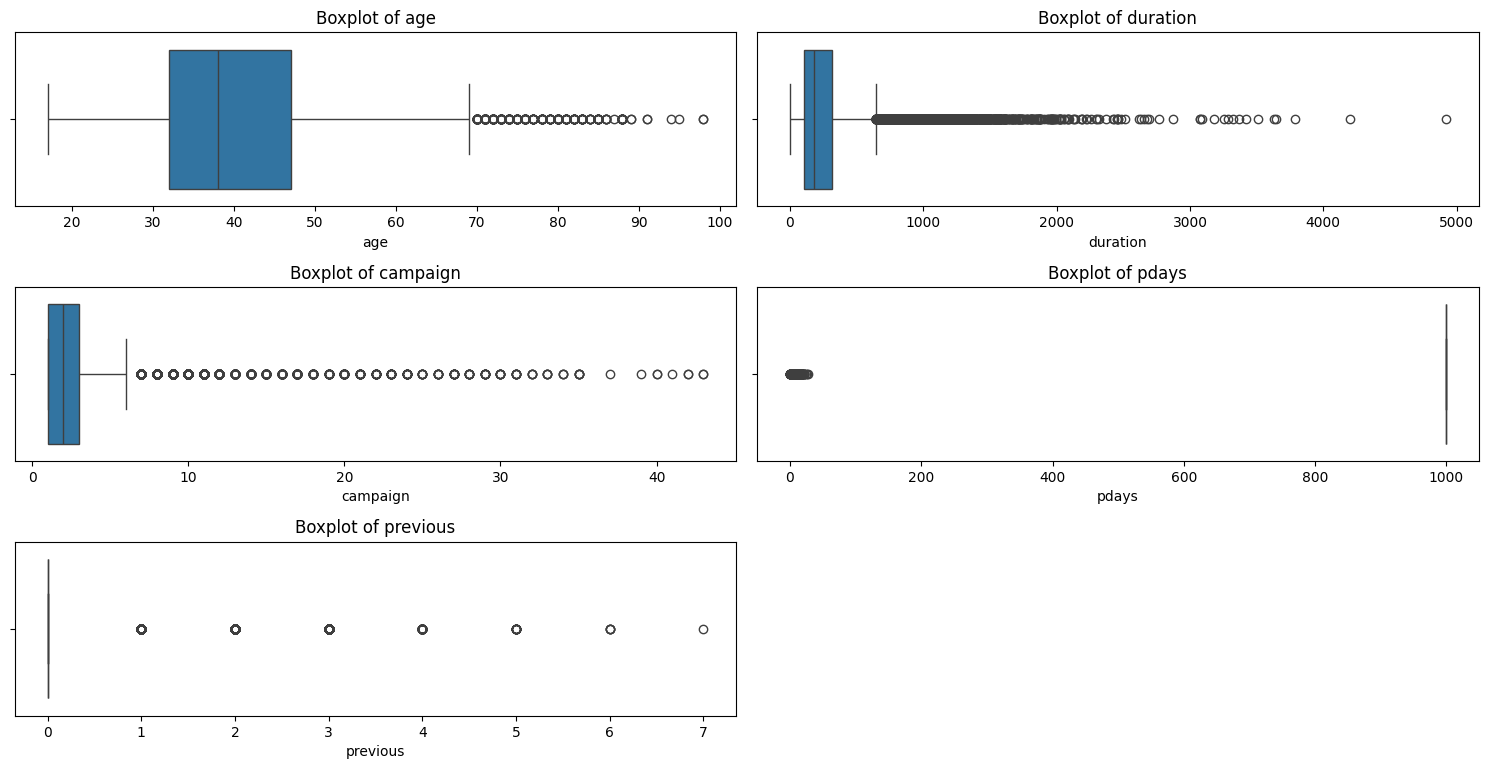

In [ ]:
#Plot Numerical Columns

#Initiate subplots
fig, axes = plt.subplots(figsize = (15, 15))
# axes = axes.flatten()


for i, column in enumerate(df_num, 1):
    plt.subplot(6, 2, i)
    sns.boxplot(x = column, data = df)
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

Talk about the code below

In [ ]:
df = df[df['campaign']<35]
df = df[df['duration']<3500]
df = df[df['age']<80]

# **III. Exploratory Data Analysis**

Upon delving into the data description, the subsequent phase involves a more profound exploration to unveil insights, encompassing both client behavior and campaign dynamics. From the client standpoint, the objective is to discern the prevalent traits of individuals likely to subscribe to our deposit service. This entails examining features such as marital status, jobs, education, and financial obligations like loans and housing.

Simultaneously, from the campaign viewpoint, the aim is to optimize employee efficiency by understanding the constraints of our actions, ultimately reducing campaign costs while upholding profitability.

## **i. Client Behaviour**

In this segment, we will explore client behavior patterns, seeking to identify prominent factors influencing their decision to make a deposit.

Text(0.5, 1.0, 'Number of clients who owns/not a housing loan within clients who does/not deposits')

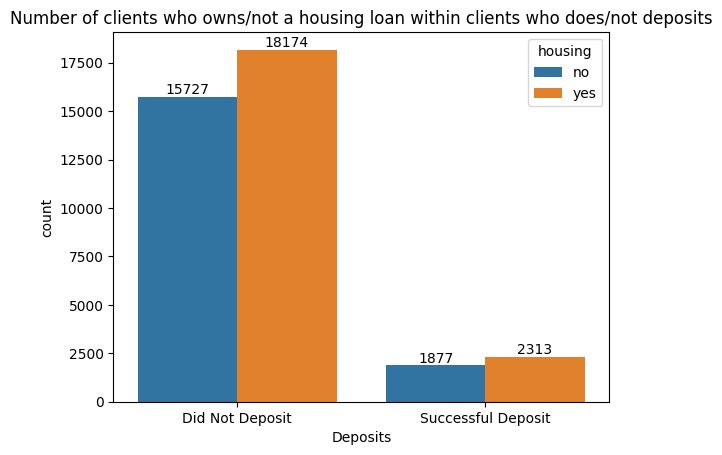

In [ ]:
# Does those who said yes has housing loans?

ax = sns.countplot(data = df, x = 'y', hue = 'housing')
ax.bar_label(ax.containers[0],fmt ='%0.0f', label_type='edge')
ax.bar_label(ax.containers[1],fmt ='%0.0f', label_type='edge')

plt.xticks([0, 1], ['Did Not Deposit', 'Successful Deposit'])
plt.xlabel('Deposits')
plt.title('Number of clients who owns/not a housing loan within clients who does/not deposits')

There are 10 % more clients who deposit ('y' = yes) and own a housing loan than those who deposit but don't own one. The same pattern in terms of the majority class is repeated by those who don't deposit. This time, there are 11 % more clients who don't deposit ('y'= no) and own a housing loan than those who don't deposit but don't own a housing loan.

This means that owning a housing loan isn't meaningful behavior for those who deposit and don't.

Text(0.5, 1.0, 'Number of clients who owns/not a loan within clients who does/not deposits')

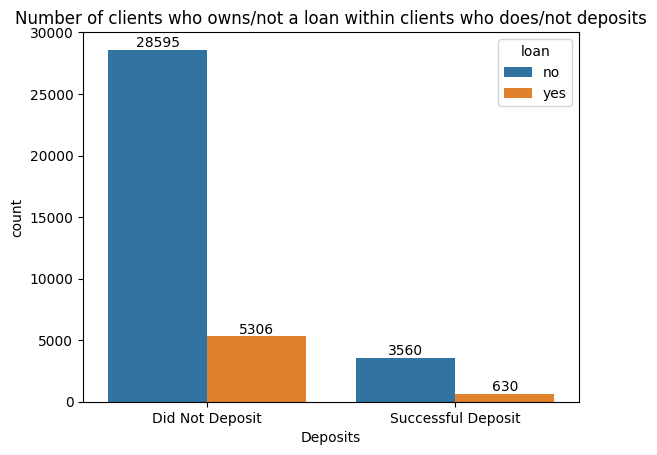

In [ ]:
# Does those who said yes has loans?

ax = sns.countplot(data = df, x = 'y', hue = 'loan')
ax.bar_label(ax.containers[0],fmt ='%0.0f', label_type='edge')
ax.bar_label(ax.containers[1],fmt ='%0.0f', label_type='edge')
plt.xticks([0, 1], ['Did Not Deposit', 'Successful Deposit'])
plt.xlabel('Deposits')
plt.title('Number of clients who owns/not a loan within clients who does/not deposits')

There is a big gap of 85 % fewer clients who deposit ('y'=yes) and own a loan than those who don't own a loan. Again the same pattern is repeated by those who don't deposit ('y' = no) and own a loan, 86% less than those who don't own a loan.
With the similarity of 'housing' and 'loan' behavior within clients. These two variables are not the determinative factors of who does and doesn't agree to deposit.     

<Figure size 1500x800 with 0 Axes>

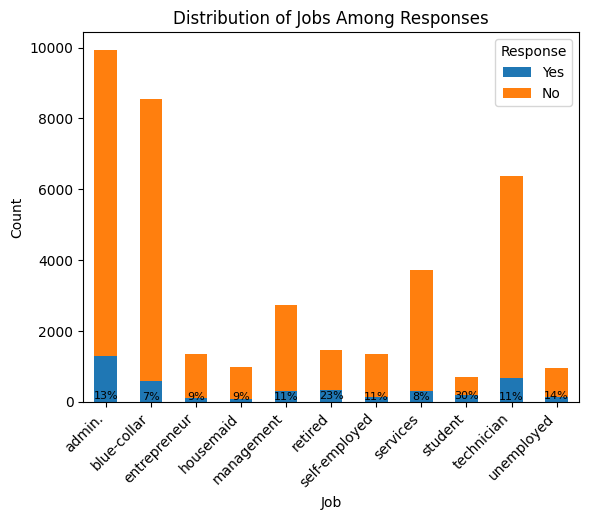

In [ ]:
# Create a DataFrame with counts of jobs for 'yes' and 'no' responses
df_jobs = df.groupby(['job', 'y']).size().unstack().fillna(0)

# Reverse the order of 'yes' and 'no' columns for each job
df_jobs[['yes', 'no']] = df_jobs[['no', 'yes']]

# Plotting the reversed stacked bar chart
plt.figure(figsize=(15, 8))
ax = df_jobs.plot(kind='bar', stacked=True)
plt.title('Distribution of Jobs Among Responses')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Modify legend labels
handles, labels = ax.get_legend_handles_labels()
labels = ['Yes', 'No']  # Change the order of labels
plt.legend(handles, labels, title='Response', bbox_to_anchor=(1, 1))

# the label
df_jobs_percentage = df_jobs.div(df_jobs.sum(axis=1), axis=0) * 100
ax1 = df_jobs_percentage.plot(kind='bar',stacked='True')
plt.close()
for container in ax1.containers:
   ax.bar_label(container, fmt='%0.0f%%', label_type='edge', color='black', fontsize=8)
   break

plt.show()

The highest proportion of depositors is owned by occupation students with 30 %. The second highest is retired with 23 % and the third is unemployed with 14 %. Admin is the fourth with 13% while technician, self-employed, and management have the same percentage of 11 %. Housemaids and entrepreneurs have the same percentage of depositors 9 %, followed by services and blue-collar.

Although it might show that students, retired, and unemployed seem to be very prospective clients to approach, further research is needed to guarantee that these percentages represent the whole population rather than a single case situation.

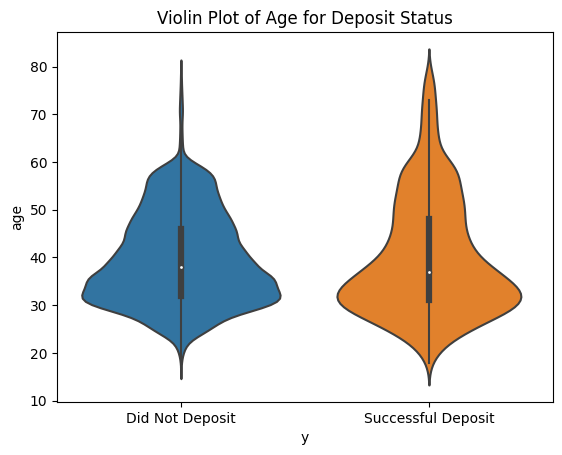

In [ ]:
sns.violinplot(x='y', y='age', data=df)

# Set custom ticks and labels
plt.xticks([0, 1], ['Did Not Deposit', 'Successful Deposit'])

# Set plot title
plt.title('Violin Plot of Age for Deposit Status')

# Show the plot
plt.show()

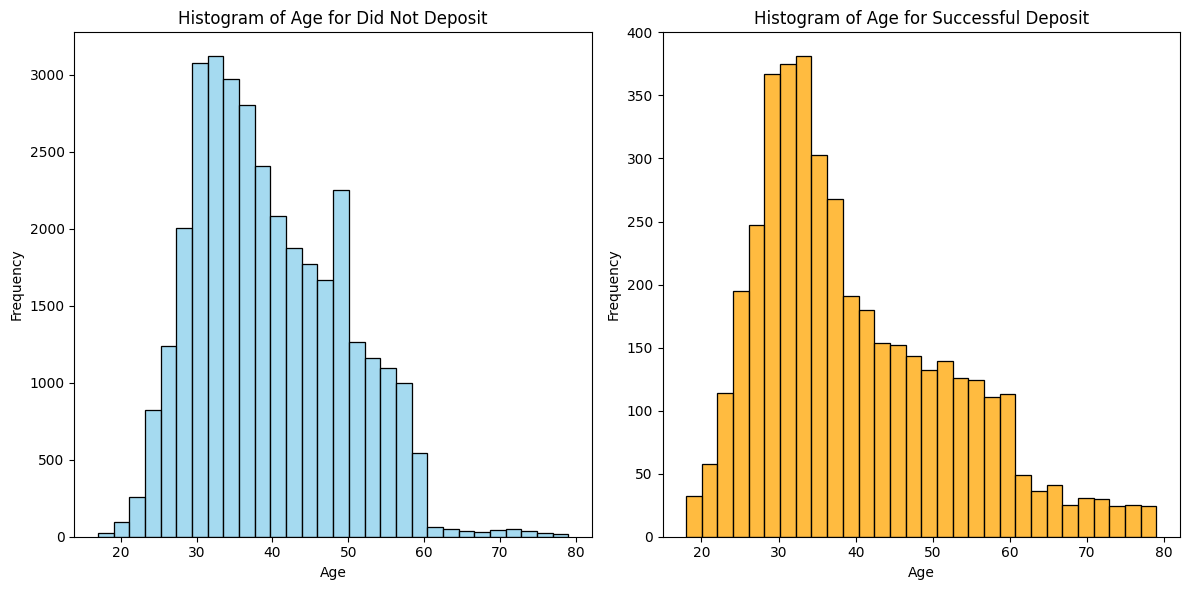

In [ ]:
plt.figure(figsize=(12, 6))

# Histogram for 'Did Not Deposit'
plt.subplot(1, 2, 1)
sns.histplot(df[df['y'] == 'no']['age'], bins=30, kde=False, color='skyblue')
plt.title('Histogram of Age for Did Not Deposit')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Histogram for 'Successful Deposit'
plt.subplot(1, 2, 2)
sns.histplot(df[df['y'] == 'yes']['age'], bins=30, kde=False, color='orange')
plt.title('Histogram of Age for Successful Deposit')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


While both depositors and non-depositors fall within the same age range according to the violin plot, there is a subtle distinction. Depositors exhibit a slightly higher preference among senior clients compared to non-depositors and can be seen with histplot, although the scale is a bit different.

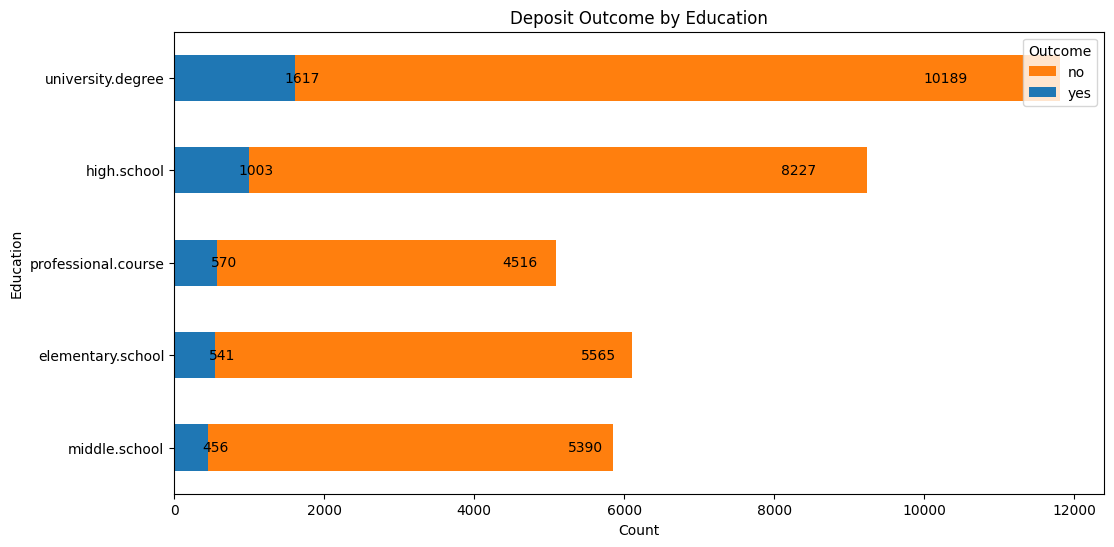

In [ ]:
# Get the top 5 education levels based on 'yes' counts
education_order = df[df['y'] == 'yes']['education'].value_counts().index[:5]

# Create a DataFrame with counts for 'yes' and 'no' for each education level
stacked_df = df.groupby(['education', 'y']).size().unstack().fillna(0).loc[education_order]

# Reverse the order of 'yes' and 'no' columns for each education level
stacked_df[['yes', 'no']] = stacked_df[['no', 'yes']]

# Manually specify the order of education levels
desired_order = ['middle.school', 'elementary.school', 'professional.course', 'high.school', 'university.degree']

# Plot the reversed horizontal stacked bar chart with the desired order
ax = stacked_df.loc[desired_order].plot(kind='barh', stacked=True, figsize=(12, 6))

plt.title('Deposit Outcome by Education')
plt.ylabel('Education')
plt.xlabel('Count')

# Add count labels for each segment
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='center', va='center', xytext=(5, 0), textcoords='offset points')

# Swap the order of legend labels correctly
handles, labels = ax.get_legend_handles_labels()
plt.legend(reversed(handles), labels, title='Outcome', loc='upper right')

# Show the plot
plt.show()


From the displayed education categories, only a small percentage ranging from 14% to 7% (from left to right) in each category are opting for deposits, with university education standing out as the most prevalent choice. Therefore, our ongoing goal should be to target individuals with higher education, specifically those with a university degree.

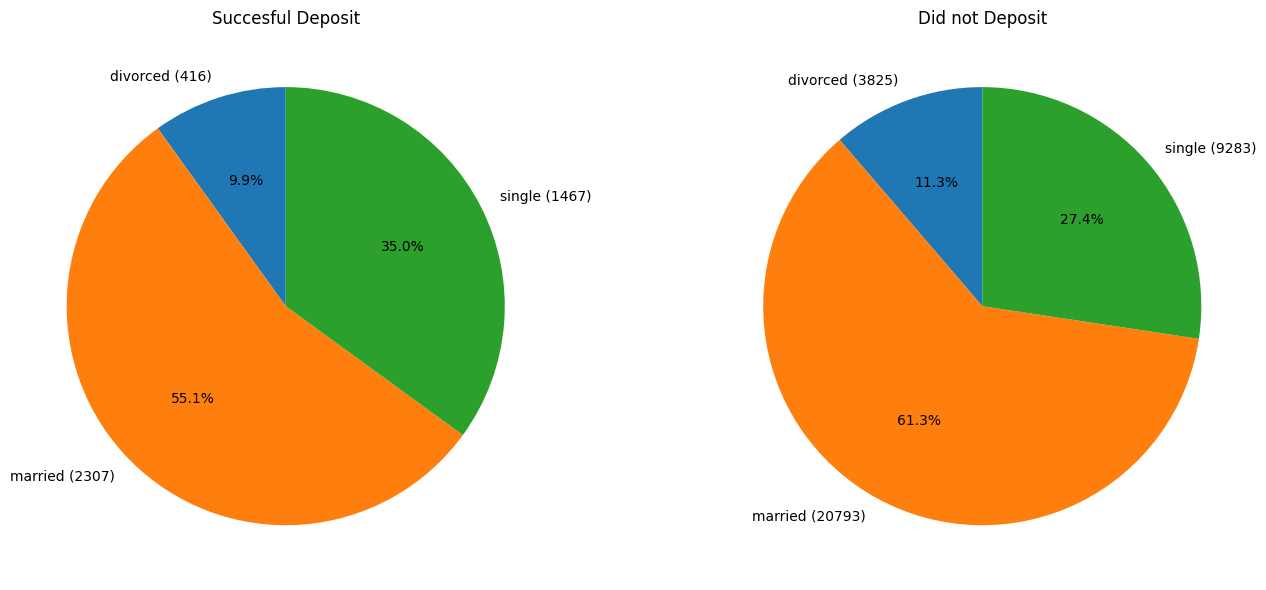

In [ ]:
marital_target_counts = df.groupby(['marital', 'y']).size().unstack(fill_value=0)

# Plot pie charts for 'no' and 'yes'
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Pie chart for 'yes'
wedges, texts, autotexts = axes[0].pie(marital_target_counts['yes'], labels=marital_target_counts.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Succesful Deposit')

# Add count labels for 'yes'
for i, (text, autotext) in enumerate(zip(texts, autotexts)):
    count_label = marital_target_counts['yes'][i]
    text.set_text(f"{text.get_text()} ({count_label})")

# Pie chart for 'no'
wedges, texts, autotexts = axes[1].pie(marital_target_counts['no'], labels=marital_target_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Did not Deposit')

# Add count labels for 'no'
for i, (text, autotext) in enumerate(zip(texts, autotexts)):
    count_label = marital_target_counts['no'][i]
    text.set_text(f"{text.get_text()} ({count_label})")

plt.tight_layout()
plt.show()


Even though our initial focus was on married clients, only 9.9% opted for our product. In contrast, single clients have a higher subscription rate at 13%. Considering this, we should broaden our outreach to single clients to improve our chances and move away from a singular focus on married clients.

## **ii. Campaign Dynamics**

In this segment, our aim is to optimize employee efficiency by understanding the constraints of our actions, ultimately reducing campaign costs while upholding profitability.

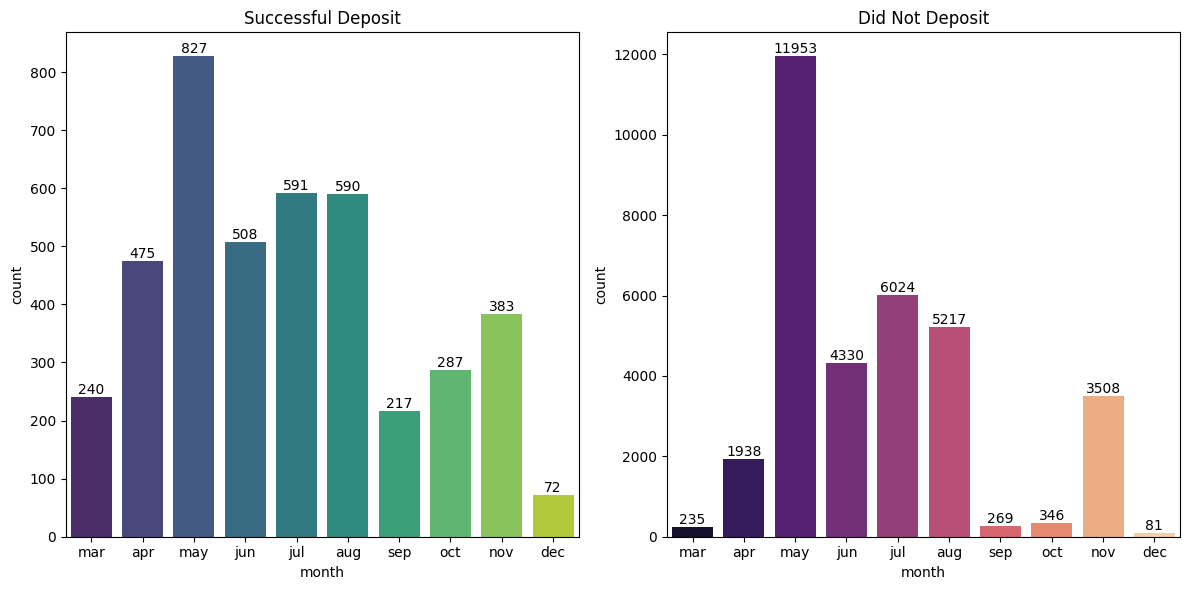

In [ ]:
month_order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

plt.figure(figsize=(12, 6))

# Plot 'yes'
plt.subplot(1, 2, 1)
ax1 = sns.countplot(x='month', data=df[df['y'] == 'yes'], palette='viridis', order=month_order)
plt.title('Successful Deposit')

# Add count labels for 'yes'
for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# Plot 'no'
plt.subplot(1, 2, 2)
ax2 = sns.countplot(x='month', data=df[df['y'] == 'no'], palette='magma', order=month_order)
plt.title('Did Not Deposit')

# Add count labels for 'no'
for p in ax2.patches:
    ax2.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


At the campaign's inception in March, we successfully engaged with 475 clients, achieving an impressive deposit rate of 50.5%. However, as the campaign progressed, call outreach expanded, peaking in May with a 6% deposit rate. The visual representation of our data illustrates a noteworthy trend: months with lower call volumes, such as March, September, October, and December, correlate with higher successful deposit rates. In contrast, months with heightened call activity, namely April, May, June, July, August, and November, exhibit comparatively lower success rates. This pattern suggests that during periods of increased call traffic, we may not have been as meticulous in client selection. This could be attributed to insufficient information, ultimately diminishing our campaign success rates and potentially impacting profitability.

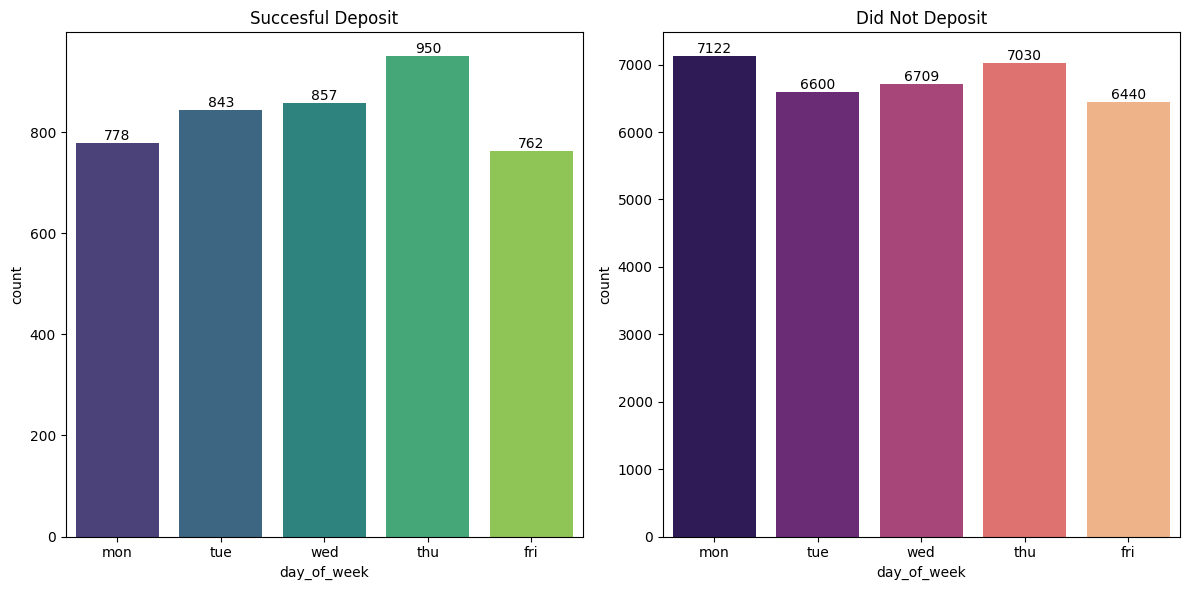

In [ ]:
plt.figure(figsize=(12, 6))

# Plot 'yes'
plt.subplot(1, 2, 1)
ax1 = sns.countplot(x='day_of_week', data=df[df['y'] == 'yes'], palette='viridis')
plt.title('Succesful Deposit')

# Add count labels for 'yes'
for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# Plot 'no'
plt.subplot(1, 2, 2)
ax2 = sns.countplot(x='day_of_week', data=df[df['y'] == 'no'], palette='magma')
plt.title('Did Not Deposit')

# Add count labels for 'no'
for p in ax2.patches:
    ax2.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In the course of this campaign, our clients exhibit the highest responsiveness on Thursdays, reaching a total of 7980, which surpasses the response on any other weekday. Thursdays also boast a successful deposit rate of 11.9%. Following closely is Monday with a total of 7900 responses, yet it has the lowest success rate among weekdays at 9.8%.

Proportion of new clients and existing clients since the previous campaign within those who did/not deposit


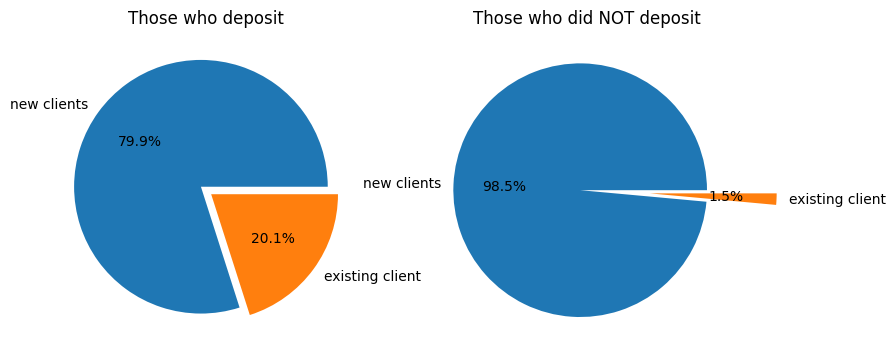

In [ ]:
df2 = df
df2['pdays'] = np.where(df['pdays']<999, 'existing client','new clients')
plt.figure(figsize=(9,5))
print('Proportion of new clients and existing clients since the previous campaign within those who did/not deposit')

plt.subplot(1,2,1)
plt.pie(x = df2[df2['y']=='yes']['pdays'].value_counts(), labels = df2['pdays'].unique(), autopct = f'%.1f%%', explode = [0.05,0.05])
plt.title('Those who deposit')

plt.subplot(1,2,2)
plt.pie(x = df2[df2['y']=='no']['pdays'].value_counts(), labels = df2['pdays'].unique(),autopct = f'%.1f%%', explode = [0.05,0.5])
plt.title('Those who did NOT deposit')


plt.show()

From these pie charts, it is evident that the proportion of existing clients who made a deposit is higher than that of those who didn't, with a notable difference of 19.1%. This result serves as an indicator that being an existing client from the previous campaign did influence the client's decision to deposit for this campaign.

Text(0.5, 1.0, 'Percentage of contacts needed to persuade a client')

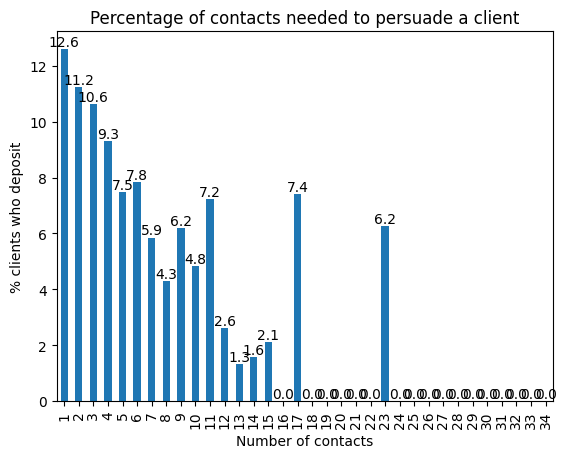

In [ ]:
# What is the number of contacts would be needed to persuade a client to deposit?
camp = pd.crosstab(df['campaign'],df['y'], normalize = 'index')*100
ax = camp['yes'].plot(kind = 'bar')
ax.bar_label(ax.containers[0], fmt= "%0.01f", label_type='edge')
plt.ylabel('% clients who deposit')
plt.xlabel('Number of contacts')
plt.title('Percentage of contacts needed to persuade a client')

Multiple contacts by the telemarketing team decrease the percentage of clients who deposit. The first call attracts 12.6 % of clients to deposit, 11.2 % for the second call, 10.6 % for the third call, and 9.3 % for the fourth call. % clients that deposit starts to decline after repetitive calls starting from 8 calls. The recommendation is to minimize the frequency of contacts with a maximum of 7 calls.

<Axes: ylabel='previous'>

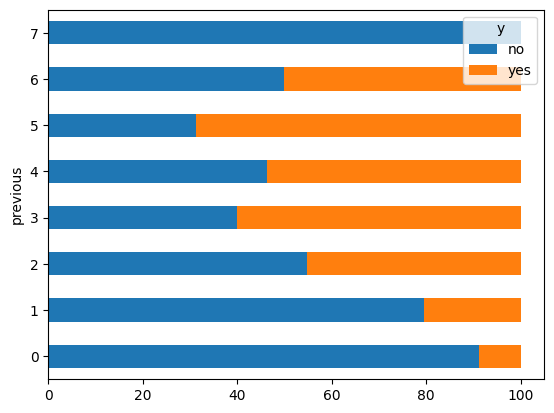

In [ ]:
#Does being contacted from the previous campaign affects a client's deposit decision?
dfpy = pd.crosstab(df['previous'],df['y'], normalize = 'index')*100
dfpy.plot(kind = 'barh', stacked = 'True')

1 to 5 phone calls for the last campaign increases the proportion of clients to agree to deposit for this campaign. After the 6th phone call and the 7th, the proportion of depositors starts to decrease even down to zero after the 7th call. This means that a client agreement is affected by previous calls and it is best to limit the number of calls up to 5 calls.

## **iii. Conclusion**

After an in-depth analysis of the dataset, we have uncovered valuable insights that shed light on both client behavior and campaign dynamics. In terms of client behavior, we observed that owning a housing loan or having other financial obligations, such as a personal loan, does not significantly impact the likelihood of clients making a deposit. These variables appear to be non-determinative factors for deposit decisions.

The highest proportion of depositors is attributed to students, constituting 30% of the total. Following closely, retired individuals account for 23%, and the third highest group comprises unemployed individuals, contributing 14%. Administrative roles secure the fourth position with 13%, while technicians, self-employed individuals, and management roles share the same percentage at 11%. Housemaids and entrepreneurs both exhibit a 9% share of depositors, and services and blue-collar workers trail with a lower percentage. While these findings indicate that students, retired individuals, and the unemployed appear to be promising client segments, it is crucial to approach these results with a level of caution. Further research is needed to ascertain whether these percentages are representative of the entire population or if they may be influenced by specific circumstances. Understanding the broader context will enable us to make more informed decisions regarding the optimal targeting strategy for these occupational segments.

While initially targeting married clients, we discovered that single clients have a higher subscription rate. Therefore, diversifying our outreach to include single clients is recommended to improve campaign effectiveness. The success rate of the campaign, as indicated by the pie charts, is 36.2%, emphasizing the need for strategic targeting to enhance overall efficiency.

Moreover, our analysis of the campaign's temporal dynamics reveals a noteworthy trend. In March, we successfully engaged with 475 clients, achieving an impressive deposit rate of 50.5%. However, as the campaign progressed, call outreach expanded, peaking in May with a 6% deposit rate. The visual representation of our data illustrates a temporal pattern: months with lower call volumes, such as March, September, October, and December, correlate with higher successful deposit rates. In contrast, months with heightened call activity, namely April, May, June, July, August, and November, exhibit comparatively lower success rates. This pattern suggests that during periods of increased call traffic, we may not have been as meticulous in client selection, potentially due to insufficient information, ultimately diminishing our campaign success rates and potentially impacting profitability. It's worth considering that clients might be subscribing more due to the perception that the campaign is nearing its end. This potential urgency factor could contribute to the higher deposit rates observed in certain months.

In the course of this campaign, our clients exhibit the highest responsiveness on Thursdays, reaching a total of 7980, which surpasses the response on any other weekday. Thursdays also boast a successful deposit rate of 11.9%. Following closely is Monday with a total of 7900 responses, yet it has the lowest success rate among weekdays at 9.8%.

## **iv. Recommendation**

**Refined Targeting Strategy:**

1. Focus on individuals with higher education, particularly those with a university degree, as they have consistently exhibited a higher likelihood of making deposits. Incorporate this insight into the campaign's client selection process to enhance targeting precision, considering potential variations in responsiveness across different months.

2. Diversify outreach efforts to include single clients, taking into account their higher subscription rate compared to married clients. Recognize the potential impact of marital status on client responsiveness and strategically broaden our engagement approach, adapting to potential fluctuations related to specific months.

**Campaign Efficiency:**

3. Given the dynamic distribution of depositors, our recommendation is to tailor the campaign strategy to effectively target the diverse occupational segments identified. Allocate resources strategically to tap into the substantial student segment, which constitutes 30% of depositors, and the significant retiree group at 23%. Simultaneously, consider a targeted approach for the 14% of unemployed individuals, acknowledging the potential for responsiveness in this segment. Importantly, conduct further research to validate whether these percentages accurately represent the broader population or if they are influenced by specific circumstances. This deeper understanding of the context will enable a more informed and targeted deployment of resources, considering potential temporal variations in responsiveness across these diverse occupational groups.

4. Enhance time efficiency by maintaining a call target of up to seven contacts. The temporal analysis suggests that exceeding this threshold tends to diminish the campaign's success rate, with attention to potential fluctuations within specific months. Implementing a strategic limit on contact attempts will likely enhance overall outreach effectiveness.

5. Implement measures to enhance time efficiency, taking into consideration the potential impact of specific months on contact attempts and adjusting strategies accordingly. This includes aligning outreach efforts with periods of optimal client responsiveness and deposit success rates, potentially exploring the efficiency benefits of a shorter campaign duration.

6. Acknowledge that keeping the campaign short may contribute to its efficiency, considering potential fluctuations in client responsiveness within specific months. Evaluating the optimal duration aligning with periods of heightened success rates could enhance overall campaign effectiveness.

**Non-determinative Factors:**

7. Recognize that owning a housing loan or having other financial obligations, such as a personal loan, does not significantly impact deposit decisions. These variables are non-determinative factors for deposit behavior, and this understanding should guide client selection and communication strategies, accounting for potential temporal variations.

**Continuous Improvement:**

8. Periodically reassess and refine the targeting strategy based on ongoing campaign performance and customer behavior trends. Regularly incorporate insights from temporal dynamics, such as the observed pattern during months of heightened call activity, to adapt and optimize outreach strategies for sustained campaign success.

# **IV. Machine Learning**

## **i. Import Library**

The initial step in machine learning involves importing essential libraries. You can choose to either manually list the required libraries or utilize a template code previously created for this purpose.

In [ ]:
# Schema
# from sklearn.pipeline import make_pipeline, Pipeline
from imblearn.pipeline import Pipeline

# Scalers
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor

# Encoding
import category_encoders as ce
# Missing value imputer
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Imbalance Sampling
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE

#F Scores
from sklearn.metrics import fbeta_score, make_scorer, r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, precision_score

# MODELS
# Linear
from sklearn.linear_model import LogisticRegression, Lasso, Ridge, LinearRegression
# DT
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
# Neighbour
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
# SVC
from sklearn.svm import SVC, SVR
# Ensemble
from sklearn.ensemble import VotingClassifier, StackingClassifier, RandomForestClassifier, GradientBoostingClassifier, VotingRegressor, StackingRegressor, RandomForestRegressor
from xgboost import XGBClassifier, XGBRegressor,plot_importance

# Train Test
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV, KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, mean_squared_error



import warnings
warnings.filterwarnings('ignore')

## **ii. Encoding & Glossary**

| Feature             | Description                                                                                     |
|---------------------|-------------------------------------------------------------------------------------------------|
|age|Numerical Value of someone's Age|
|job|type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed")|
|marital|marital status (categorical: "divorced","married","single"; note: "divorced" means divorced or widowed)|
|education|(categorical: "elementary.school","middle.school","high.school","illiterate","professional.course","university.degree")|
|housing|has housing loan? (categorical: "no","yes")
|loan|has personal loan? (categorical: "no","yes")
|contact| contact communication type (categorical: "cellular","telephone")
|month|last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")
|day_of_week|last contact day of the week (categorical: "mon","tue","wed","thu","fri")
|campaign|number of contacts performed during this campaign and for this client (numeric, includes the last contact)
|previous|number of contacts performed before this campaign and for this client (numeric)

Before diving into the details, it's important to understand that encoding serves as an intermediary step, helping us convert data into a format suitable for machine processing. Let's explore this process further.

In [ ]:
df['y'] = df['y'].replace({'yes': 1, 'no': 0})

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous',
       'y'],
      dtype='object')

In [ ]:
# Skema FE

binary_encode = Pipeline([
    ('BE', ce.BinaryEncoder())
])

transformer = ColumnTransformer([
    ('OHE', OneHotEncoder(drop='first'), ['housing', 'loan', 'contact']),
    ('BE', binary_encode, ['job', 'month', 'day_of_week', 'marital']),
    ('OE', OrdinalEncoder(categories= [['illiterate', 'elementary.school', 'middle.school', 'high.school', 'professional.course', 'university.degree']]), ['education'])
], remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('OHE', OneHotEncoder(drop='first'),
                                 ['housing', 'loan', 'contact']),
                                ('BE',
                                 Pipeline(steps=[('BE', BinaryEncoder())]),
                                 ['job', 'month', 'day_of_week', 'marital']),
                                ('OE',
                                 OrdinalEncoder(categories=[['illiterate',
                                                             'elementary.school',
                                                             'middle.school',
                                                             'high.school',
                                                             'professional.course',
                                                             'university.degree']]),
                                 ['education'])])

This transformer, named 'transformer', handles the encoding of different categorical features.
- One-Hot Encoding (OHE): It uses the OneHotEncoder (OneHotEncoder(drop='first')) to encode the features 'housing', 'loan', and 'contact', dropping the first column to avoid multicollinearity.
- Binary Encoding (BE): It incorporates the binary encoding pipeline defined earlier for the features 'job', 'month', 'day_of_week', and 'marital'.
- Ordinal Encoding (OE): It uses the OrdinalEncoder to encode the 'education' feature with specified custom categories.
- The parameter remainder='passthrough' indicates that any remaining features not specified for encoding will be passed through without changes.
In summary, this pipeline applies a combination of one-hot encoding, binary encoding, and ordinal encoding to different categorical features, creating a transformed dataset suitable for training machine learning models.

## **iii. Model Listing**

Listing Down 3 Base Models: Decision Tree, Linear and KNN.

Followed by 5 Ensemble Models: Voting, Stacking, Gradient Boosting, XGB and Random Forest

In [ ]:
tree = DecisionTreeClassifier(max_depth=5, random_state=2023)
logreg = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=5)
xgb = XGBClassifier()
rf = RandomForestClassifier(random_state=2023)
gbc = GradientBoostingClassifier(random_state=2023)
vc = VotingClassifier(estimators=[
    ('model1', tree),
    ('model2', knn),
    ('model3', logreg),
    ('model4', xgb),
    ('model5', rf)
], voting='soft')
sc = StackingClassifier(estimators=[
    ('model1', tree),
    ('model2', knn),
    ('model3', logreg),
    ('model4', xgb),
    ('model5', rf)
], final_estimator=DecisionTreeClassifier())


Since there are imbalance within our data, importing imbalance treatment libraries is needed.

In [ ]:
smote = SMOTE(random_state=2023)
ros = RandomOverSampler(random_state=2023)
rus = RandomUnderSampler(random_state=2023)
nm = NearMiss()

## **iv. Train Test Splitting**

Here, we split between our features and our target. Since we do not need duration and pdays, we can exclude them.

In [ ]:
x = df.drop(['y', 'duration','pdays'],axis=1)
y = df['y']

xtrain, xtest, ytrain, ytest = train_test_split(
    x,
    y,
    stratify=y,
    random_state=2023,
    test_size=0.2
)

## **v. Pipeline & Benchmarking**

### **- Choosing Benchmark Models**
On this step, we will iterate all of our models using for loop through a pipeline. After going thru the pipeline, we will go into cross validation process to train our models better, each cross validation will have their own results which then we will see the average Precision Scores.

In [ ]:
# Define the precision scorer
precision_scorer = make_scorer(precision_score)

model = [tree, logreg, knn, vc, sc, xgb, rf]
resamp = [smote, ros, rus, nm]
m_tracker = []
resamp_tracker = []
score = []
precision_scores = []
std = []

for i in model:
    for j in resamp:
        model_pipe = Pipeline([
            ('trans', transformer),
            ('imba', j),
            ('clf', i)])
        pipecv = cross_val_score(model_pipe, xtrain, ytrain, cv=5, scoring=precision_scorer)
        score.append(pipecv)
        precision_scores.append(pipecv.mean())
        std.append(pipecv.std())
        m_tracker.append(i)
        resamp_tracker.append(j)

pd.DataFrame({
    'Model': m_tracker,
    'Resamp': resamp_tracker,
    'Precision Score': precision_scores,
    'Precision std': std
}).sort_values('Precision Score', ascending=False).head()


,Model,Resamp,Precision Score,Precision std
20,"XGBClassifier(base_score=None, booster=None, c...",SMOTE(random_state=2023),0.524455,0.006947
12,"VotingClassifier(estimators=[('model1',\n ...",SMOTE(random_state=2023),0.433108,0.010890
24,RandomForestClassifier(random_state=2023),SMOTE(random_state=2023),0.412656,0.026822
25,RandomForestClassifier(random_state=2023),RandomOverSampler(random_state=2023),0.367563,0.010241
13,"VotingClassifier(estimators=[('model1',\n ...",RandomOverSampler(random_state=2023),0.361004,0.006792


As we can see from the result table, XGB Classifier came out on top with precision score of 52%, followed by Voting Classifier at 43%. Based on that, we will benchmark these two models for our machine learning.

### **- Benchmark Models**

In [ ]:
model = {'XGB Classifier': xgb,
         'Voting Classifier': vc}
resamp = [smote]
m_tracker = []
resamp_tracker = []
precision_scores = []

for model_name, clf in model.items():
    for resampler in resamp:
        bench_mod = Pipeline([
            ('trans', transformer),
            ('imba', resampler),
            ('clf', clf)])
        bench_mod.fit(xtrain, ytrain)
        pred = bench_mod.predict(xtest)

        precision = precision_score(ytest, pred)
        precision_scores.append(precision)
        m_tracker.append(model_name)
        resamp_tracker.append(resampler)

pd.DataFrame({
    'Model': m_tracker,
    'Resamp': resamp_tracker,
    'Precision Score': precision_scores,
}).sort_values('Precision Score', ascending=False).head()


,Model,Resamp,Precision Score
0,XGB Classifier,SMOTE(random_state=2023),0.507289
1,Voting Classifier,SMOTE(random_state=2023),0.442478


Benchmarking showed a good result with a close-gap score compared to cross validation process. As XGB came out as the better model, **we will use XGB from this point forward**

## **vi. Hyper Parameter Tuning**

#### **- XGB Classifier**

In [ ]:
model_pipe = Pipeline([
            ('trans', transformer),
            ('imba', smote),
            ('clf', xgb)
])

model_pipe.fit(xtrain, ytrain)
pred = model_pipe.predict(xtest)
print(classification_report(ytest, pred))


              precision    recall  f1-score   support

           0       0.91      0.98      0.94      6781
           1       0.51      0.21      0.29       838

    accuracy                           0.89      7619
   macro avg       0.71      0.59      0.62      7619
weighted avg       0.86      0.89      0.87      7619



In [ ]:
# Hyper-Parameter Tuning

space = {
    'clf__n_estimators': [50, 100, 200],
    'clf__learning_rate': [0.01, 0.1, 0.2],
    'clf__max_depth': [3, 5, 7],
}

grid_search = GridSearchCV(
    model_pipe,
    param_grid=space,
    cv=5,
    scoring=precision_scorer,
    n_jobs= -1
)

In [ ]:
grid_search.fit(xtrain,ytrain)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trans',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('OHE',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['housing',
                                                                          'loan',
                                                                          'contact']),
                                                                        ('BE',
                                                                         Pipeline(steps=[('BE',
                                                                                          BinaryEncoder())]),
                                                                         ['job',
                                                                          'month',
                                                                          'day_of_week',
                                                                          'marital']),
                                                                        ('OE',
                                                                         OrdinalEncoder(categories=[['illiterate',
                                                                                                     'elementary.school',
                                                                                                     'middle.school',
                                                                                                     'high...
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'clf__learning_rate': [0.01, 0.1, 0.2],
                         'clf__max_depth': [3, 5, 7],
                         'clf__n_estimators': [50, 100, 200]},
             scoring=make_scorer(precision_score))

In [ ]:
grid_search.best_score_

0.5404678981001846

In [ ]:
grid_search.best_params_

{'clf__learning_rate': 0.1, 'clf__max_depth': 3, 'clf__n_estimators': 200}

In [ ]:
grid_search.best_estimator_.fit(xtrain,ytrain)
pred = grid_search.predict(xtest)
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      6781
           1       0.54      0.16      0.24       838

    accuracy                           0.89      7619
   macro avg       0.72      0.57      0.59      7619
weighted avg       0.86      0.89      0.87      7619



In [ ]:
print(confusion_matrix(ytest,pred))

[[6671  110]
 [ 707  131]]


**Class 0:**
- 90% are labeled 0 and are, in reality, 0.
- 10% are labeled 0 but in reality are 1.

**Class 1:**
- 54% are labeled 1 and are, in reality, 1.
- 46% are labeled 1 but in reality are 0.

## **vii. Feature Importance**

#### I. XGBoost Model

In [ ]:
model_pipe = Pipeline([
            ('trans', transformer),
            ('imba', smote),
            ('clf', xgb)
])

model_pipe.fit(xtrain, ytrain)
pred = model_pipe.predict(xtest)
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      6781
           1       0.51      0.21      0.29       838

    accuracy                           0.89      7619
   macro avg       0.71      0.59      0.62      7619
weighted avg       0.86      0.89      0.87      7619



In [ ]:
feature_names= model_pipe['trans'].get_feature_names_out().tolist()
model_pipe['clf'].get_booster().feature_names = feature_names


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

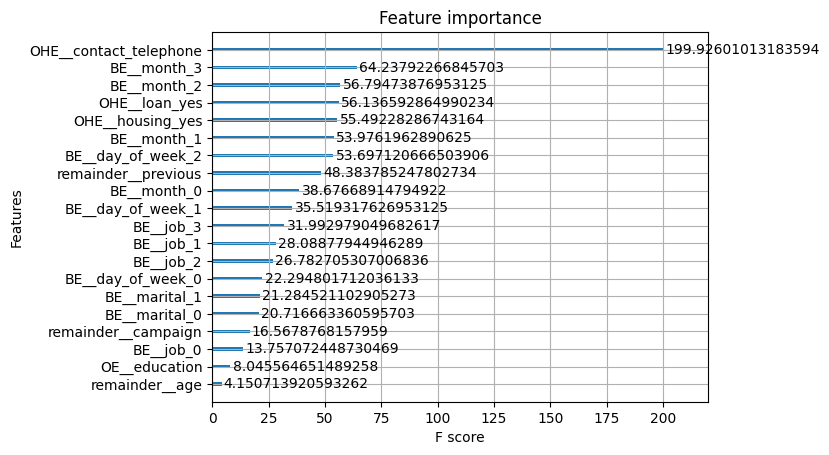

In [ ]:
plot_importance(model_pipe['clf'], importance_type = 'gain')

# **V. C.L.R (Conclusion, Limitation and Recommendation)**

### **Conclusion**

In our machine learning analysis, we determined that the XGB Classifier is the optimal model for this dataset. It achieved a 52% precision score during cross-validation, maintaining a consistent 50% precision score on the test data. Post hyperparameter tuning through grid search, the precision score improved to 54%, indicating the dataset's suitability for modeling, with the XGB Classifier demonstrating effectiveness.

Despite the model's decent performance, the confusion matrix reveals that the model is relatively accurate in predicting instances of Class 0 but struggles with misclassifications in Class 1. While it performs well in identifying instances labeled as 0, the misclassification rate for instances labeled as 1 is notably higher. The model may need further refinement to improve its overall performance and avoid potential underfitting issues associated with heavy reliance on specific features.

### **Limitation**

1. Imbalanced Data: The dataset exhibits a substantial class imbalance, with approximately 89% of instances belonging to the "no" class and only 11% to the "yes" class. This severe imbalance might impact the model's ability to accurately predict the minority class, and oversampling techniques like SMOTE were employed to address this issue.

2. Limited Exploration of Hyperparameters: The benchmark results provide precision scores, but hyperparameter tuning might not have been extensively explored. Fine-tuning hyperparameters could potentially improve the model's performance.

3. Single Dominant Feature: The presence of one highly significant feature and others having less impact suggests potential issues:
- Underfitting: The model might be relying too heavily on a specific feature, leading to a high bias.

While our model currently heavily relies on a single feature for predictions, it's important to acknowledge a potential limitation in terms of representativeness. Relying solely on this feature may not capture the full complexity of the underlying patterns in the data. To enhance the model's performance and generalizability, we should explore the inclusion of additional relevant features to provide a more comprehensive view of the underlying relationships and improve its overall effectiveness

### **Recommendation**

To enhance the effectiveness of upcoming marketing initiatives, it is advisable to consider key features that provide valuable insights into customer behavior and financial profiles.

- Strive for a more balanced dataset, as the current one exhibits a significant disparity with an 89% to 11% ratio between the two target classes. Achieving a more equitable distribution will likely contribute to enhanced model accuracy and reliability in making predictions.
- The inclusion of geographic information allows for tailoring campaigns to local economic conditions and preferences, facilitating a more personalized and targeted approach.
- An analysis of the customer's existing banking products and services yields a comprehensive understanding of their financial relationship with the institution, enabling tailored promotions and offers.
- If feasible, the incorporation of transaction history, particularly focusing on regular deposits or patterns, can provide valuable insights for identifying financially stable individuals more likely to subscribe to deposit services.
- Additionally, obtaining credit scores is instrumental, as a positive credit score often signifies financial responsibility and eligibility for specific deposit products.

Collectively, these features contribute to a more robust and insightful dataset, empowering machine learning models to make more precise predictions and significantly enhance campaign impact.

# **VI. Model Impact**

From the machine learning model, it has its advantages and disadvantages since the model is not quite perfect yet due to a high imbalance in the dataset. The target class (class 1 or positive) constitutes 11%, while the other (class 0 or negative) is 89%. This can be addressed with more documentation on the positive class in the future to achieve a balance.

Let's deep dive into the results where :

## Hypothetical case
**Case:** We have 100,000 clients with a success rate of around 36% (only 35,740 clients actually deposit).
From our exploratory data analysis, we gathered a few results:
1. The number of calls needed to persuade a client was 1-3, with a maximum of 7 calls.
2. The average cost for a call is \$2.7, based on the source below.
3. The minimum amount for deposit is 100 euro or \$109.

Source: [Link1](https://www.cxtoday.com/contact-centre/how-to-calculate-your-cost-per-inbound-outbound-call-and-why/),
[Link2](https://withportugal.com/en/immigration/depositos-portugal)

## Based on our classification report (precision):
**Class 0:**
- 90% are labeled 0 and are, in reality, 0.
- 10% are labeled 0 but in reality are 1.

**Class 1:**
- 54% are labeled 1 and are, in reality, 1.
- 46% are labeled 1 but in reality are 0.

**a. Without Machine Learning:**
Telemarketing team needs to contact each client 3 times.
- The cost = \$2.7 x 3 x 100,000 clients = \$810,000
- Wasted cost = \$ 2.7 x 3 x (100,000 - 35,740 clients) = \$520,506
- All clients will be reached out.

**b. With Machine Learning:**
Say our model predicted 58,500 customers will deposit (labeled as class 1).
- The cost = \$2.7 x 3 x 58,500 clients = \$473,850
- Extra = \$2.7 x 3 x (100,000 - 58,500 clients) = \$336,150

However, since this model is still flawed with 46% incorrectly predicted as deposit (when, in reality, they do not deposit), there will be some wasted cost below.
- Wasted cost = \$2.7 x 3 x (46% x 58,500 clients) = \$217,971

For class 0, our model predicted the rest of the 41,500 clients will NOT deposit. Since there is an 10% error or incorrectly predicted as will not deposit (when, in reality, they deposit), there will be some clients unreached.
- Unreached clients = 10% x 41,500 clients = 4,150 clients.
- Wasted profit = \$ 109 x 4,150 clients = \$ 452,350

In conclusion, the pros and cons are:

|   |Without machine learning| With machine learning   |
|---|-------------------------|-------------------------|
|Overall Cost| \$810,000            | \$473,850                |
|Wasted Cost | \$520,506            | \$217,971                |
|Unreached Clients| None          | 4,150 clients           |
|Deposit amount|\$ 3,895,660      |\$ 3,443,310|
|Net profit | \$3,085,660      | \$2,969,460|         


As mentioned shortly before, the major problem with the model is the imbalanced dataset causing greater and better prediction for class 0 data. The model needs more records on clients who deposit. Features that might be considered useful for the prediction include the income of each client. If the model is applied, A/B testing can be used to compare results with the model and without, ensuring that using a machine learning model is factually more efficient and profitable for the company.

In [ ]:
# # Save model
import pickle

final_model = GridSearchCV(
    model_pipe,
    param_grid=space,
    cv=5,
    scoring=precision_scorer,
    n_jobs= -1
)

final_model.fit(xtrain,ytrain).fit(xtrain, ytrain)

pickle.dump(final_model, open('Final_Model_Bank_Deposit.sav', 'wb'))

In [ ]:
# # Load Model

# file_name = Final_Model_Bank_Deposit.sav'
# load_model = pickle.load(open(file_name, 'rb'))
# load_model